# Analysing the Tags + Metrics Dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

In [2]:
# data import
current_dir = os.getcwd()

# construct path to the project data folder
data_dir = os.path.join(current_dir, '..', '..', 'Data','Sonar_Issues')

# load SonarQube measure data (without duplicates)
df = pd.read_csv(os.path.join(data_dir, 'measures+tags.csv'), low_memory=False)

df

,PROJECT_ID,SQ_ANALYSIS_DATE,CLASSES,FILES,LINES,NCLOC,PACKAGE,STATEMENTS,FUNCTIONS,COMMENT_LINES,...,FUNCTION_COMPLEXITY,COGNITIVE_COMPLEXITY,LINES_TO_COVER,UNCOVERED_LINES,DUPLICATED_LINES,DUPLICATED_BLOCKS,DUPLICATED_FILES,COMMENT_LINES_DENSITY,DUPLICATED_LINES_DENSITY,TAGS
0,accumulo,2008-07-07 14:52:05,2108.0,1103.0,263680.0,203873.0,164,105125.0,17295.0,13509.0,...,2.5,39453.0,121105.0,121105.0,46445,2410,207,6.2,17.6,"bad-practice, unused, suspicious, confusing, r..."
1,accumulo,2008-07-01 18:16:28,2108.0,1103.0,263702.0,203883.0,164,105150.0,17299.0,13509.0,...,2.5,39454.0,121139.0,121139.0,46445,2410,207,6.2,17.6,error-handling
2,accumulo,2008-06-12 17:11:34,2108.0,1131.0,278798.0,214326.0,164,111432.0,18092.0,15204.0,...,2.6,39465.0,127191.0,127191.0,46581,2416,210,6.6,16.7,design
3,accumulo,2008-06-10 12:05:27,2107.0,1130.0,278644.0,214193.0,164,111350.0,18090.0,15204.0,...,2.6,39428.0,127106.0,127106.0,46581,2416,210,6.6,16.7,convention
4,accumulo,2008-06-10 11:35:56,2107.0,1130.0,278644.0,214194.0,164,111349.0,18091.0,15204.0,...,2.6,39428.0,127107.0,127107.0,46581,2416,210,6.6,16.7,convention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17174,vfs,2002-08-21 06:21:26,79.0,72.0,9488.0,5203.0,16,1900.0,460.0,1587.0,...,1.6,468.0,2259.0,2259.0,66,4,1,23.4,0.7,clumsy
17175,vfs,2002-08-21 01:40:45,73.0,69.0,9169.0,5005.0,16,1837.0,440.0,1563.0,...,1.6,457.0,2185.0,2185.0,66,4,1,23.8,0.7,"error-handling, antipattern"
17176,vfs,2002-08-20 06:10:50,69.0,65.0,8859.0,4814.0,14,1787.0,425.0,1536.0,...,1.6,445.0,2124.0,2124.0,66,4,1,24.2,0.7,"suspicious, error-handling"
17177,vfs,2002-08-20 02:57:02,69.0,65.0,8867.0,4835.0,14,1794.0,422.0,1533.0,...,1.6,449.0,2131.0,2131.0,66,4,1,24.1,0.7,"suspicious, error-handling"


## Distribution of projects

In [3]:
# count rows for each project
project_counts = df['PROJECT_ID'].value_counts()
project_counts

PROJECT_ID
hive                     1856
cocoon                   1232
ambari                   1175
batik                    1143
felix                     938
configuration             869
collections               776
archiva                   752
io                        617
net                       609
vfs                       518
beanutils                 496
atlas                     495
accumulo                  479
httpcomponents-client     437
mina-sshd                 394
dbcp                      387
httpclient                367
bcel                      364
validator                 317
codec                     315
cayenne                   294
httpcomponents-core       291
santuario                 283
httpcore                  269
aurora                    258
jxpath                    211
jexl                      180
cli                       178
exec                      141
fileupload                107
zookeeper                 105
thrift                    102

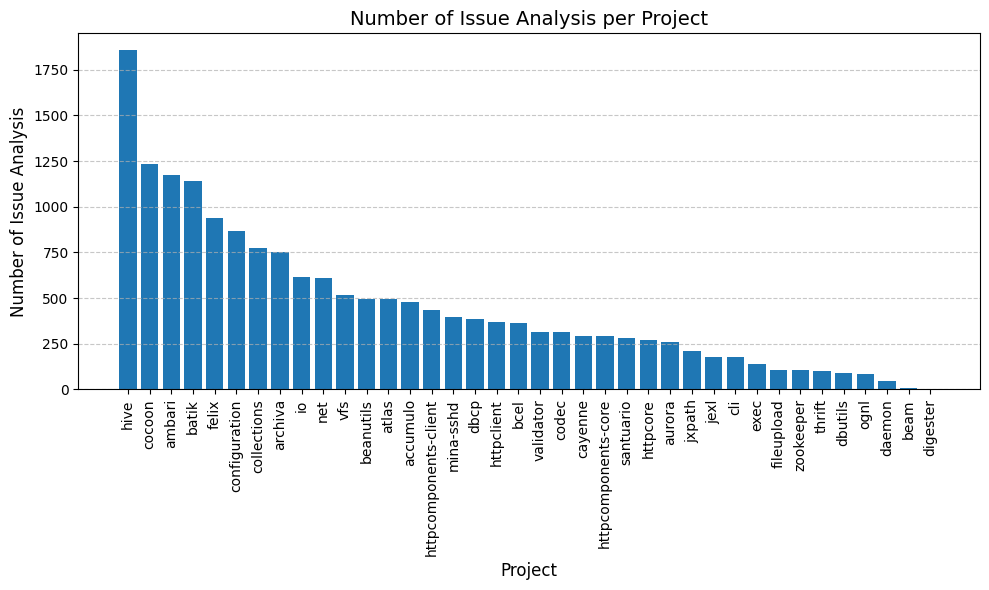

In [4]:
plt.figure(figsize=(10, 6))

plt.bar(project_counts.index, project_counts.values)

plt.xlabel("Project", fontsize=12)
plt.ylabel("Number of Issue Analysis", fontsize=12)
plt.title("Number of Issue Analysis per Project", fontsize=14)

# rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [5]:
len(df['PROJECT_ID'].unique())

38

The representations of projects in the dataset is very uneven, with hive being strongly represented but for some projects there
are les than 150 rows. Also, not all projects have their issues represented in the dataset. Only 38/39 projects are represented in issues.

## Distribution of tags

In [6]:
df['TAGS']

0        bad-practice, unused, suspicious, confusing, r...
1                                           error-handling
2                                                   design
3                                               convention
4                                               convention
                               ...                        
17174                                               clumsy
17175                          error-handling, antipattern
17176                           suspicious, error-handling
17177                           suspicious, error-handling
17178                    antipattern, clumsy, bad-practice
Name: TAGS, Length: 17179, dtype: object

In [7]:
all_categories = []

for category_string in df['TAGS']:
    # handle missing values
    if pd.isna(category_string):
        continue
    # split the string by comma into a list and add to all_categories
    individual_tags = [tag.strip() for tag in category_string.split(',')]
    all_categories.extend(individual_tags)

# count categories in all_categories
category_counts = Counter(all_categories)
category_counts

Counter({'error-handling': 6544,
         'convention': 6099,
         'suspicious': 4767,
         'design': 4757,
         'pitfall': 4455,
         'brain-overload': 4329,
         'unused': 3787,
         'bad-practice': 3181,
         'antipattern': 2869,
         'clumsy': 2815,
         'redundant': 1235,
         'performance': 1098,
         'obsolete': 608,
         'confusing': 523})

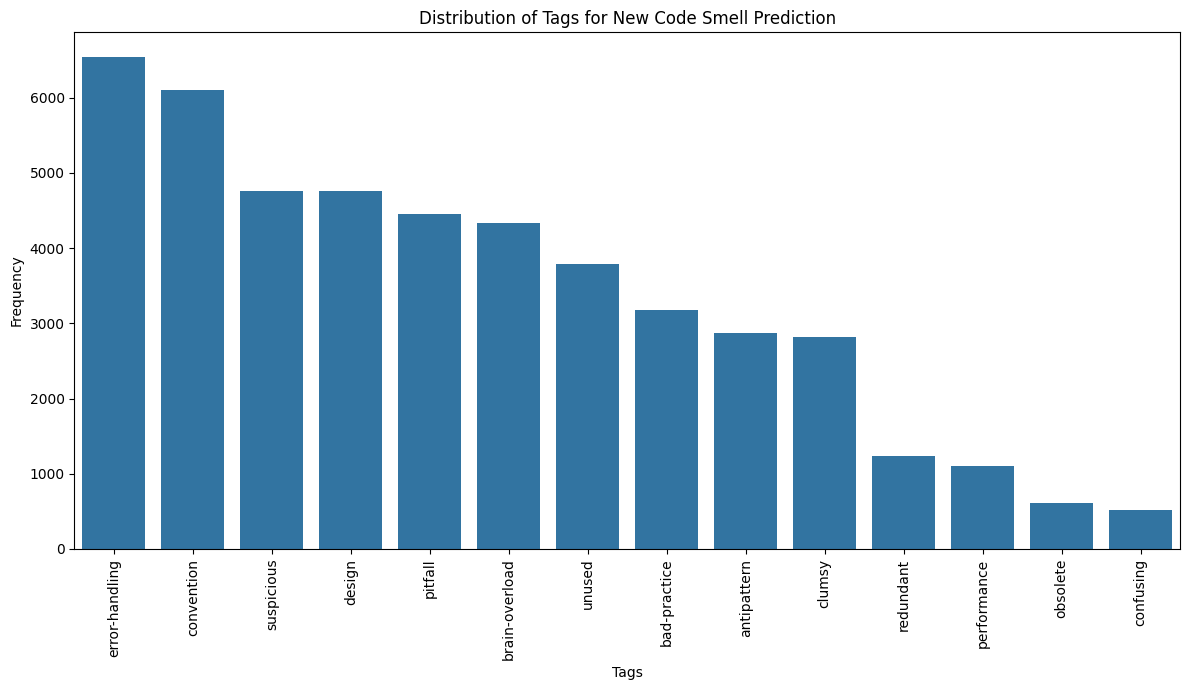

In [8]:
# converting counter into a pd series for easier plotting and sorting
category_counts_series = pd.Series(category_counts).sort_values(ascending=False)

plt.figure(figsize=(12, 7))

sns.barplot(x=category_counts_series.index, y=category_counts_series.values,)

plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.title("Distribution of Tags for New Code Smell Prediction")

plt.xticks(rotation=90, ha='center')

plt.tight_layout()
plt.show()

## Time Analysis
For the data prepared for the NN, to see whether there is a time dependency, it is to be investigated how often the analysis occurs.

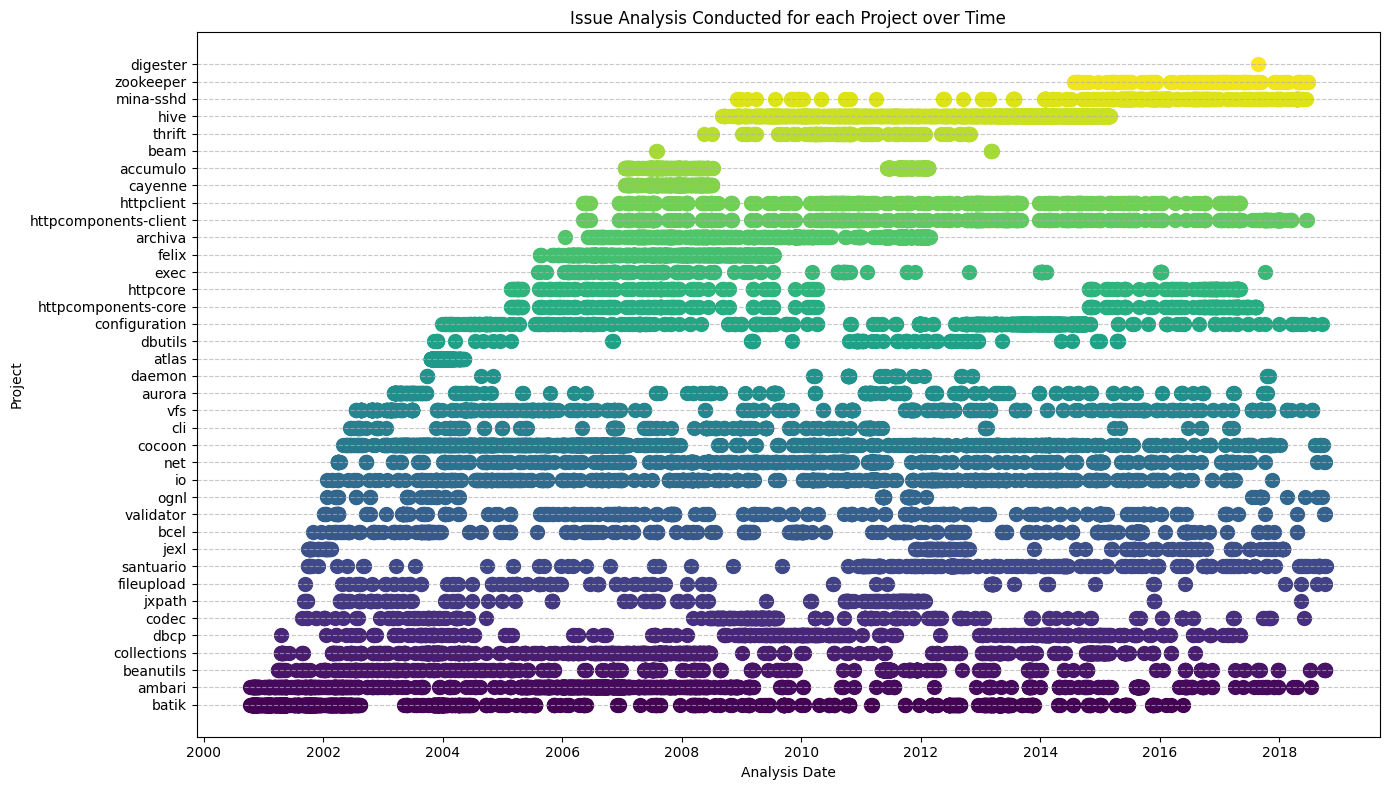

In [16]:
df = df.sort_values(by='SQ_ANALYSIS_DATE').reset_index(drop=True)
df['SQ_ANALYSIS_DATE'] = pd.to_datetime(df['SQ_ANALYSIS_DATE'])

plt.figure(figsize=(14, 8))

# add grid that aligns each project name with their points for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# create color map that assignes each project a distinct color
unique_project_ids = df['PROJECT_ID'].unique()
num_unique_projects = len(unique_project_ids)
colors_map_object = plt.colormaps['viridis'].resampled(num_unique_projects)
color_map = {proj_id: colors_map_object(i) for i, proj_id in enumerate(unique_project_ids)}

# plot time stamps for each project
for i, project_id in enumerate(unique_project_ids):
    project_df = df[df['PROJECT_ID'] == project_id]
    plt.scatter(
        x=project_df['SQ_ANALYSIS_DATE'],
        y=project_df['PROJECT_ID'],
        s=100,
       color=color_map[project_id]
    )

plt.xlabel("Analysis Date")
plt.ylabel("Project")
plt.title("Issue Analysis Conducted for each Project over Time")

plt.tight_layout()
plt.show()

## Distribution of predictors
To better understand if the predictors have an univariate or multivariate distribution, the distributions are plotted.

### Distribution of predictors over all projects

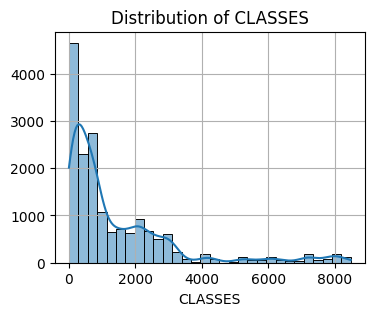

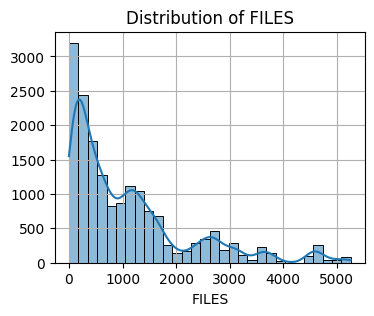

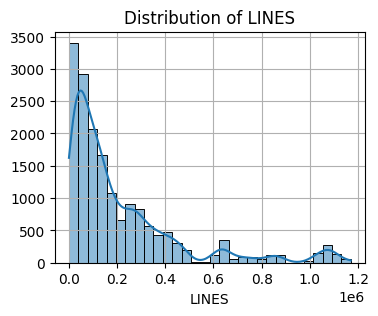

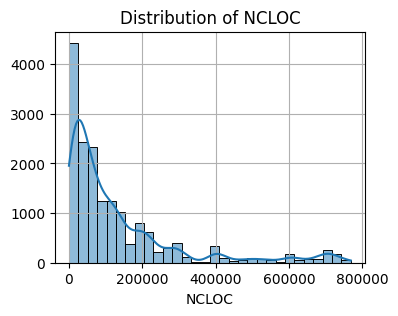

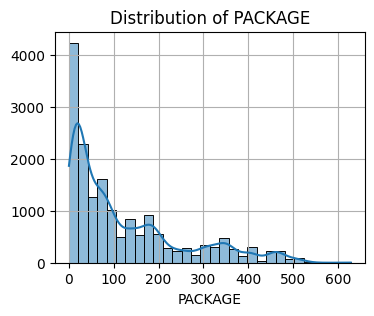

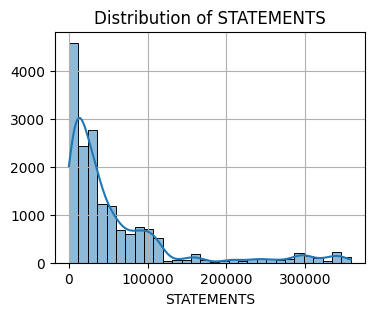

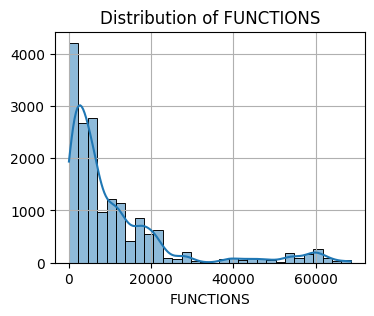

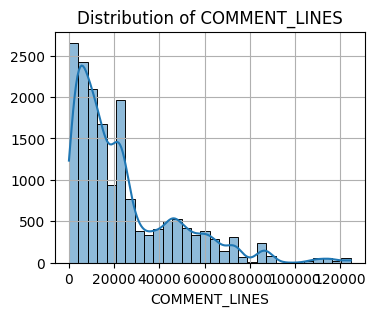

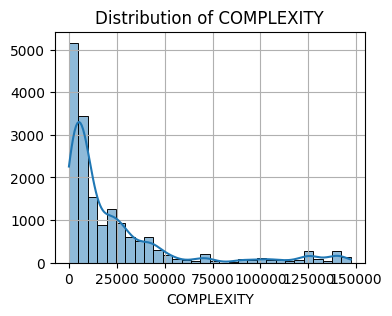

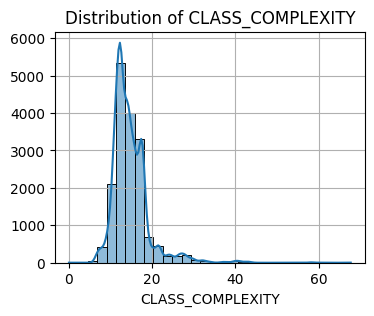

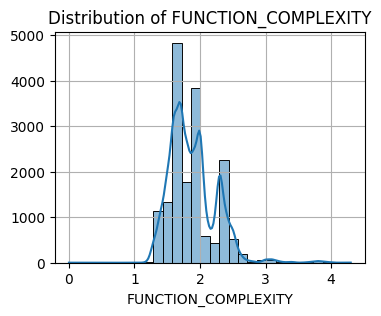

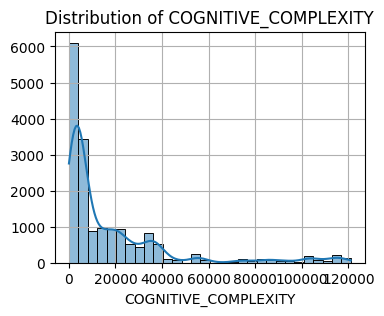

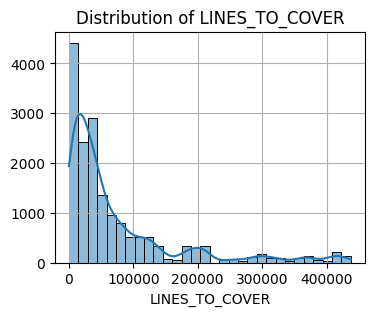

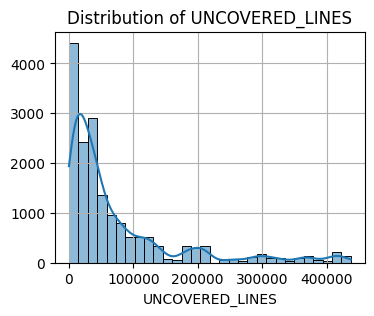

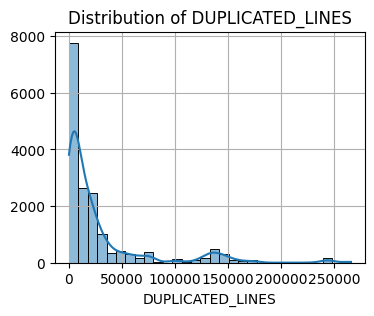

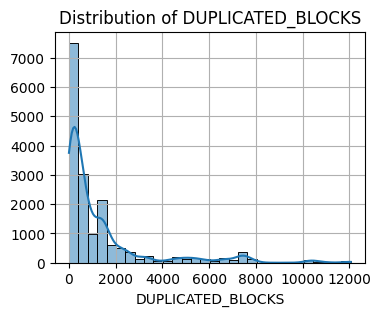

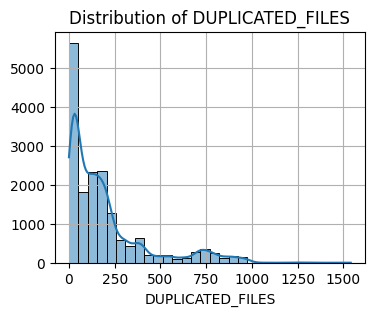

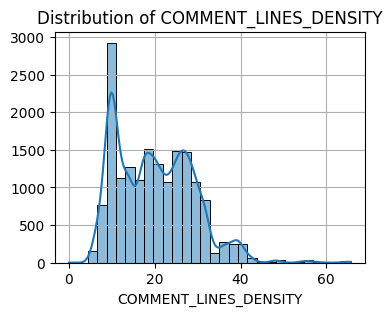

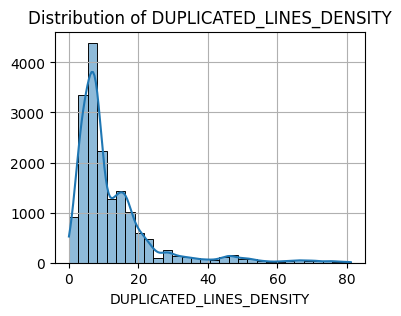

<Figure size 640x480 with 0 Axes>

In [10]:
# select only predictors / numerical variables from df
df_num = df.select_dtypes(include='number')

for i, col in enumerate(df_num.columns):
    plt.figure(figsize=(4,3))
    sns.histplot(df_num[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('')
    plt.title(f"Distribution of {col}")
    plt.grid(True)
    plt.show()

plt.tight_layout()
plt.show()

The overall distributions look univariate.

### Distribution of predictors for hive project
Since the first try on modelling tags will be done on project hive, let's investigate this project separately.

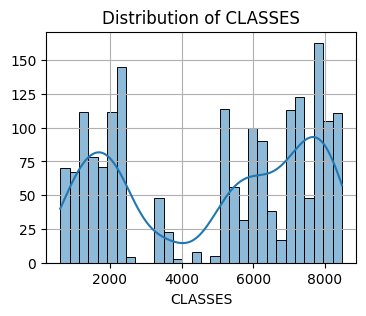

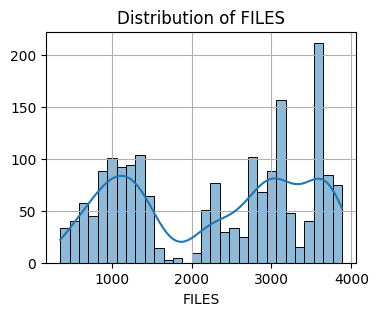

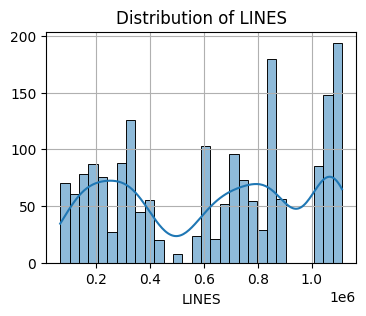

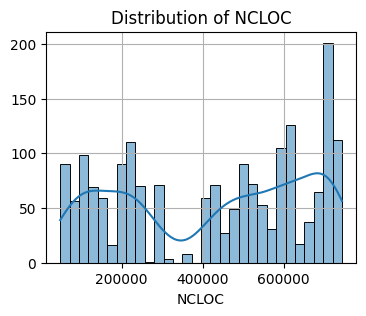

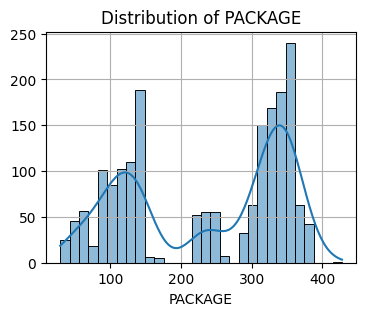

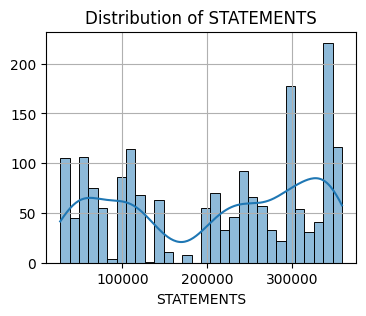

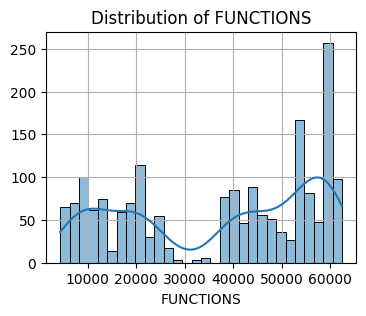

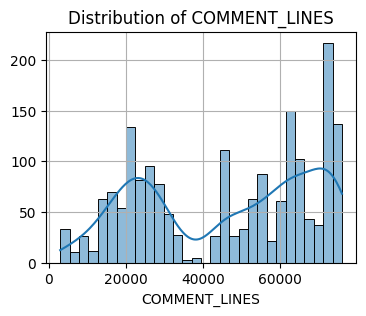

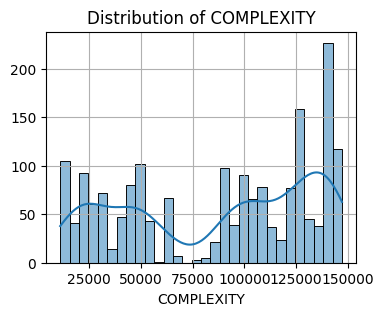

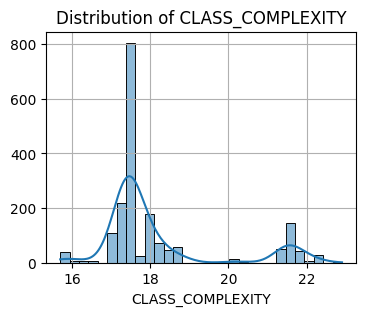

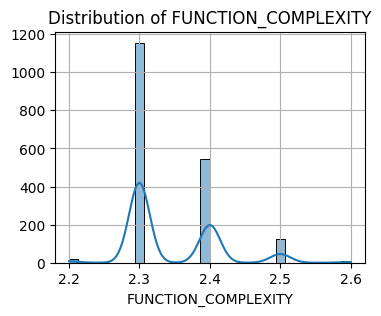

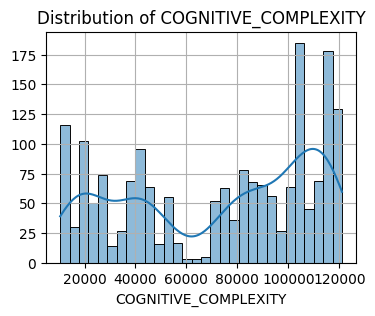

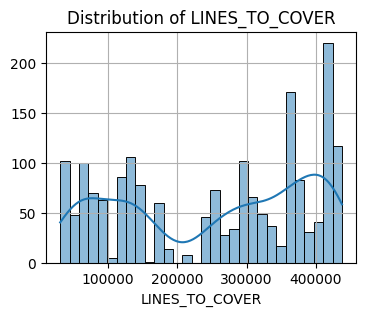

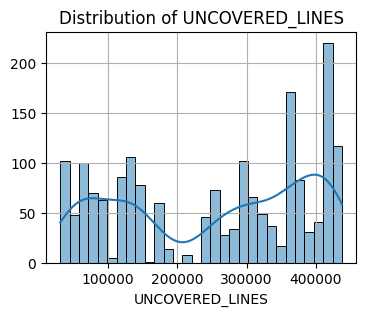

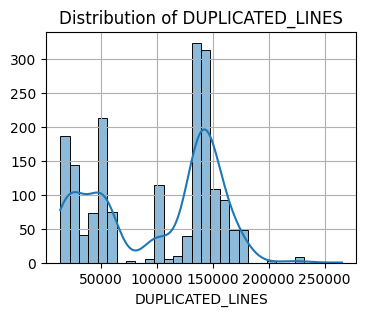

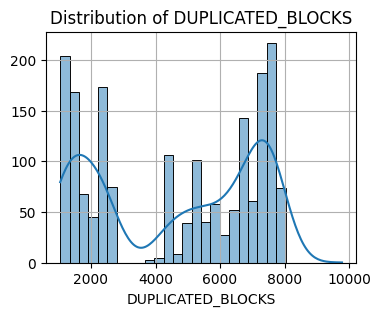

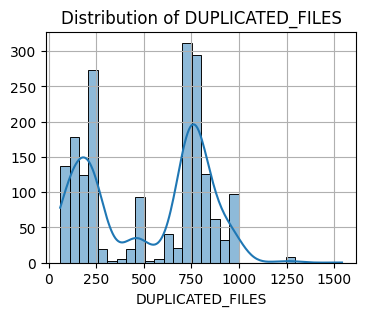

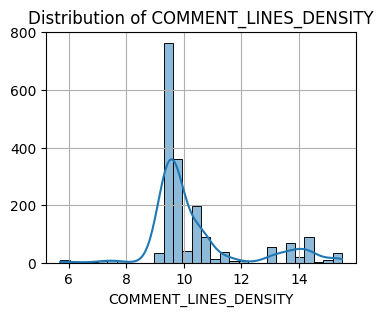

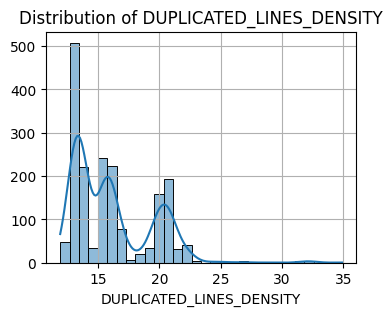

<Figure size 640x480 with 0 Axes>

In [11]:
# select only predictors / numerical variables from df
df_sub = df[df['PROJECT_ID'] == 'hive']
df_num = df_sub.select_dtypes(include='number')

for i, col in enumerate(df_num.columns):
    plt.figure(figsize=(4,3))
    sns.histplot(df_num[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('')
    plt.title(f"Distribution of {col}")
    plt.grid(True)
    plt.show()

plt.tight_layout()
plt.show()

For hive specifically, a lot of variables seem to have a bivariate distribution.

## Unique tags in hive

In [12]:
df_sub['TAGS']

7519     error-handling, clumsy, brain-overload, design...
7548                                brain-overload, clumsy
7552                                    convention, design
7553     error-handling, clumsy, brain-overload, design...
7556     error-handling, clumsy, brain-overload, bad-pr...
                               ...                        
15390    error-handling, clumsy, design, suspicious, pi...
15391                                              pitfall
15392                                  convention, pitfall
15394           error-handling, design, unused, suspicious
15395         brain-overload, unused, antipattern, pitfall
Name: TAGS, Length: 1856, dtype: object

In [13]:
all_categories = []

for category_string in df_sub['TAGS']:
    # handle missing values
    if pd.isna(category_string):
        continue
    # split the string by comma into a list and add to all_categories
    individual_tags = [tag.strip() for tag in category_string.split(',')]
    all_categories.extend(individual_tags)

# count categories in all_categories
category_counts = Counter(all_categories)
category_counts

Counter({'convention': 809,
         'brain-overload': 800,
         'unused': 670,
         'error-handling': 656,
         'bad-practice': 520,
         'pitfall': 514,
         'clumsy': 512,
         'suspicious': 479,
         'design': 443,
         'antipattern': 393,
         'redundant': 210,
         'confusing': 100,
         'performance': 100,
         'obsolete': 44})

In [14]:
len(category_counts)

14

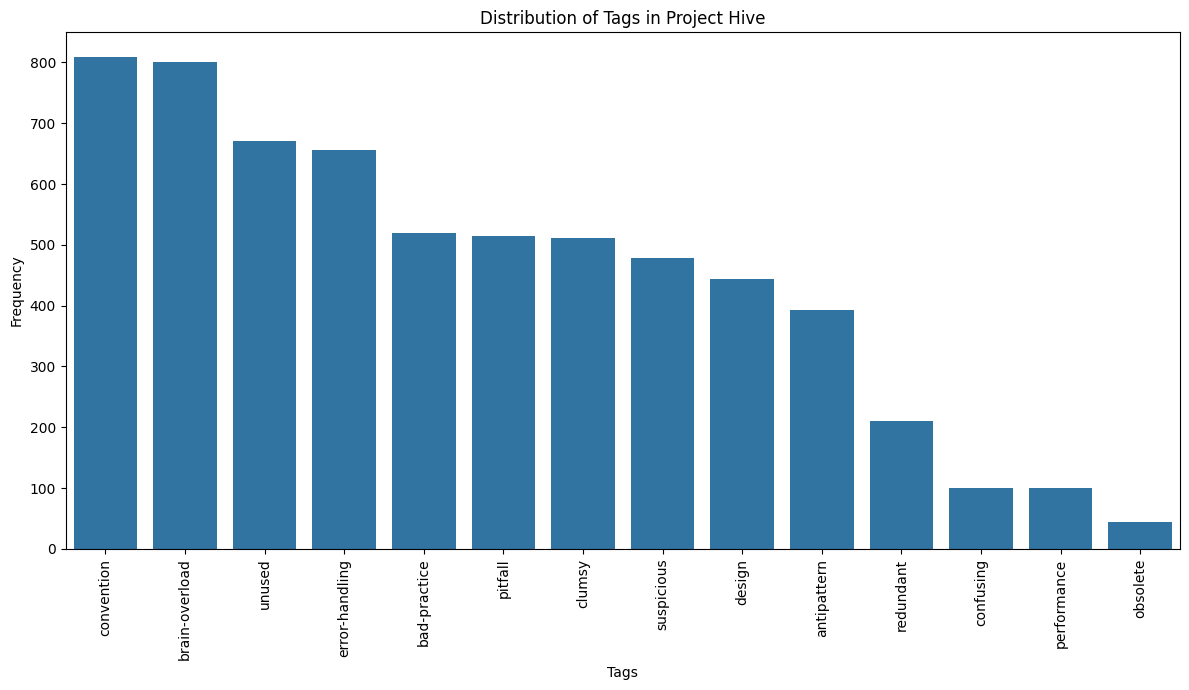

In [18]:
# converting counter into a pd series for easier plotting and sorting
category_counts_series = pd.Series(category_counts).sort_values(ascending=False)

plt.figure(figsize=(12, 7))

sns.barplot(x=category_counts_series.index, y=category_counts_series.values,)

plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.title("Distribution of Tags in Project Hive")

plt.xticks(rotation=90, ha='center')

plt.tight_layout()
plt.show()